In [1]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


['pT_xjj0p9_newweight.png', 'PT_xbb0p95_reweighted.png', 'output_xbb0p7.png', 'outparquet', 'output_xbb0p95.png', '.DS_Store', 'LICENSE', 'requirements.txt', 'ZJets.ipynb', 'mSD_xjj0p9_newweight.png', 'output_xjj0p7.png', 'pyproject.toml', 'mSD_xbb0p9_reweighted.png', 'mSD_xbb0p95_reweighted.png', 'output_xbb0p95_nokfactor.png', 'PT_xjj0p9_reweighted.png', 'mSD_xbb0p7_reweighted.png', 'README.md', 'output_xbb0p7_nokfactor.png', 'output_xbb0p95_kfactor.png', 'output_xjj0p7_nokfactor.png', '.gitignore', 'output_xjj0p95.png', 'output_xjj0p9.png', 'print_parquet.py', 'outfiles', 'mSD_xjj0p9_reweighted.png', 'PT_xbb0p7_reweighted.png', '.git', 'data', 'output_xjj0p95_nokfactor.png', 'PT_xbb0p9_reweighted.png', 'output_xbb0p9.png', 'mSDplot.ipynb', 'output_xbb0p9_nokfactor.png', 'src']


In [2]:

from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

In [3]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [157]:
import pandas as pd

# Replace 'your_file.parquet' with the path to your Parquet file
#df = pd.read_parquet('/Users/gbibim/Here/genZ/data/children/2023/Wto2Q-2Jets_PTQQ-100to200_1J/parquet/out_0.parquet')
df = pd.read_parquet('/Users/gbibim/Here/genZ/data/children/2023/0-1.parquet')
#df = pd.read_parquet('/Users/gbibim/Here/hpt/0-1.parquet')

df.columns

##("AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35", 2),
    #("AK8PFJet400_SoftDropMass40", 2),
    #("AK8PFJet230_SoftDropMass40_PNetBB0p06", 2),
    #("AK8PFJet425_SoftDropMass40", 2), 

MultiIndex([(                                            'GenVEta', 0),
            (                                            'GenVPhi', 0),
            (                                           'GenVMass', 0),
            (                                             'GenVPt', 0),
            (                                       'GenVChildren', 0),
            (                                       'GenVChildren', 1),
            (                                          'GenVis_bb', 0),
            (                                          'GenVis_cc', 0),
            (                                          'GenVis_cs', 0),
            (                                     'bbFatJetVMatch', 0),
            (                                     'bbFatJetVMatch', 1),
            (                                       'ak8FatJetEta', 0),
            (                                       'ak8FatJetEta', 1),
            (                                       'ak8FatJetPh

In [145]:
df["GenVis_bb"]

,0
0,False
1,False
2,False
3,False
4,True
...,...
298010,False
298011,False
298012,False
298013,False


In [146]:
var = df["GenVChildren"]
var

,0,1
0,1,1
1,3,3
2,3,3
3,3,3
4,5,5
...,...,...
298010,2,2
298011,4,4
298012,4,4
298013,1,1


In [127]:
val = (df["GenVChildren"][0]==5) & (df["GenVChildren"][1]==5)# | (df["GenVChildren"][0]==3) & (df["GenVChildren"][1]==4)
val


Series([], dtype: bool)

In [ ]:
h_msd = hist.Hist(
h_msd.fill(msd[selection], process, sample, weight=weight[selection])

In [4]:
# Handling the directories

MAIN_DIR = "/Users/gbibim/Here/genZ/"
dir_name = "data"  # data for older samples new for the files with lhe variables
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

In [5]:
# Define the samples stucture
samples = {
    "data": {
        "JetMET_Run2023Cv1",
        "JetMET_Run2023Cv2",
        "JetMET_Run2023Cv3",
        "JetMET_Run2023Cv4",
    },
    "Diboson": {
        "ZZ",
        "WZ",
        "WW",
        "WWto4Q",       
    },
    "TT": {
        "TTto4Q",
        "TTto2L2Nu",
        "TTtoLNu2Q",
    },
    "Zto2QNLO": {
        "Zto2Q-2Jets_PTQQ-100to200_1J",
        "Zto2Q-2Jets_PTQQ-100to200_2J",
        "Zto2Q-2Jets_PTQQ-200to400_1J",
        "Zto2Q-2Jets_PTQQ-200to400_2J",
        "Zto2Q-2Jets_PTQQ-400to600_1J",
        "Zto2Q-2Jets_PTQQ-400to600_2J",
        "Zto2Q-2Jets_PTQQ-600_1J",
        "Zto2Q-2Jets_PTQQ-600_2J",
    },
    "Wto2QNLO": {
        "Wto2Q-2Jets_PTQQ-100to200_1J",
        "Wto2Q-2Jets_PTQQ-100to200_2J",
        "Wto2Q-2Jets_PTQQ-200to400_1J",
        "Wto2Q-2Jets_PTQQ-200to400_2J",
        "Wto2Q-2Jets_PTQQ-400to600_1J",
        "Wto2Q-2Jets_PTQQ-400to600_2J",
        "Wto2Q-2Jets_PTQQ-600_1J",
        "Wto2Q-2Jets_PTQQ-600_2J",
    },
    "QCD": {
        "QCD_HT-40to70",
        "QCD_HT-70to100",
        "QCD_HT-100to200",
        "QCD_HT-200to400",
        "QCD_HT-400to600",
        "QCD_HT-600to800",
        "QCD_HT-800to1000",
        "QCD_HT-1000to1200",
        "QCD_HT-1200to1500",
        "QCD_HT-1500to2000",
    }

    
}

In [6]:
# Dir dict and columns to be loaded

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    ("ak8FatJetmsoftdrop", 2),
    #("ak8FatJetPNetMass", 2),
    ("ak8FatJetPNetTXbb", 2),
    ("ak8FatJetPNetTXjj", 2),
    ("ak8FatJetPt", 2),
    ("AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35", 1), # for 2022 and a small fraction of 2023
    ("AK8PFJet230_SoftDropMass40_PNetBB0p06", 1), #new for 2023
    ("AK8PFJet400_SoftDropMass40", 1),
    ("AK8PFJet425_SoftDropMass40", 1),
]   

In [127]:
samples.items()

dict_items([('data', {'JetMET_Run2023Cv3', 'JetMET_Run2023Cv2', 'JetMET_Run2023Cv1', 'JetMET_Run2023Cv4'}), ('Diboson', {'WW', 'ZZ', 'WZ'}), ('TT', {'TTtoLNu2Q', 'TTto4Q', 'TTto2L2Nu'}), ('Zto2QNLO', {'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-100to200_1J'}), ('Wto2QNLO', {'Wto2Q-2Jets_PTQQ-600_1J', 'Wto2Q-2Jets_PTQQ-600_2J', 'Wto2Q-2Jets_PTQQ-200to400_1J', 'Wto2Q-2Jets_PTQQ-400to600_2J', 'Wto2Q-2Jets_PTQQ-100to200_1J', 'Wto2Q-2Jets_PTQQ-200to400_2J', 'Wto2Q-2Jets_PTQQ-400to600_1J', 'Wto2Q-2Jets_PTQQ-100to200_2J'}), ('QCD', {'QCD_HT-400to600', 'QCD_HT-1000to1200', 'QCD_HT-40to70', 'QCD_HT-70to100', 'QCD_HT-800to1000', 'QCD_HT-600to800', 'QCD_HT-200to400', 'QCD_HT-1500to2000', 'QCD_HT-1200to1500', 'QCD_HT-100to200'})])

In [7]:
events_dict = {}

# Loop through Zto2Q and ZtoNuNu
for process, sample_list in samples.items():
    events_dict[process] = {}

    for input_dir, dirs_samples in dirs.items():
        events_dict[process] = {
            **events_dict[process],
            **utils.load_samples(
                input_dir,
                process,
                sample_list,
                year,
                columns=utils.format_columns(load_columns),
            ),
        } 

sample_name JetMET_Run2023Cv2
Loading JetMET_Run2023Cv2
Loaded JetMET_Run2023Cv2                                 : 6896268 entries
sample_name JetMET_Run2023Cv4
Loading JetMET_Run2023Cv4
Loaded JetMET_Run2023Cv4                                 : 48193191 entries
sample_name JetMET_Run2023Cv3
Loading JetMET_Run2023Cv3
Loaded JetMET_Run2023Cv3                                 : 7514289 entries
sample_name JetMET_Run2023Cv1
Loading JetMET_Run2023Cv1
Loaded JetMET_Run2023Cv1                                 : 23051745 entries
sample_name WZ
Loading WZ
Loaded WZ                                                : 130647 entries
sample_name ZZ
Loading ZZ
Loaded ZZ                                                : 18883 entries
sample_name WW
Loading WWto4Q
Loaded WWto4Q                                            : 734289 entries
Loading WW
Loaded WW                                                : 187939 entries
sample_name WWto4Q
Loading WWto4Q
Loaded WWto4Q                                       

In [192]:
events_dict["Zto2QNLO"]["Zto2Q-2Jets_PTQQ-600_1J"]["AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35"]

,0
0,False
1,False
2,False
3,False
4,False
...,...
1035410,False
1035411,False
1035412,False
1035413,False


In [119]:
events_dict["Zto2QNLO"]["Zto2Q-2Jets_PTQQ-600_1J"]["finalWeight"].sum()

1527.500362748481

In [17]:
events_dict["data"]


{'JetMET_Run2023Cv2':         weight ak8FatJetmsoftdrop              ak8FatJetPNetTXbb  \
              0                  0            1                 0   
 0          1.0          66.812500 -99999.00000          0.002026   
 1          1.0         114.625000 -99999.00000          0.001119   
 2          1.0          21.640625     40.75000          0.000770   
 3          1.0          91.750000 -99999.00000          0.000086   
 4          1.0           2.263672    253.62500          0.732422   
 ...        ...                ...          ...               ...   
 6896263    1.0           3.884766    180.62500          0.006184   
 6896264    1.0         110.062500 -99999.00000          0.001735   
 6896265    1.0          41.250000     48.71875          0.522461   
 6896266    1.0           8.414062     66.93750          0.160034   
 6896267    1.0           3.427734     17.46875          0.008575   
 
                       ak8FatJetPNetTXjj               ak8FatJetPt            \


In [10]:
import mplhep as hep
plt.style.use(hep.style.CMS)

In [8]:
sample_axis = hist.axis.StrCategory([], name="name", growth=True)  #samples
msd_axis = hist.axis.Regular(80, 40, 110, name="msd", label="mSD [GeV]")
proc_axis = hist.axis.StrCategory([], name="process", growth=True)  #processes
pt_axis = hist.axis.Regular(50, 200, 1000, name="pt", label="Jet $p_T$ [GeV]")
trig_axis = hist.axis.Regular(100, 0, 1, name="trigger", label="Trigger")

In [62]:
h_msd = hist.Hist(msd_axis)
msd = df["ak8FatJetmsoftdrop"][0]
first = df["GenVChildren"][0]
second = df["GenVChildren"][1]
selection = (first == 4) #& (second == 4)#) | ((first == 4) & (second == 3))
h_msd.fill(msd[selection])

Hist(Regular(80, 40, 110, name='msd', label='mSD [GeV]'), storage=Double()) # Sum: 14.0 (35.0 with flow)

In [401]:
import json
from pathlib import Path

with Path(f"/Users/gbibim/Here/hpt/data/fatjet_triggereff_2023_txbb_QCD.json").open("r") as filehandler:
    combined = json.load(filehandler)

# Print the keys to understand the structure
print(combined["corrections"])

[{'name': 'fatjet_triggereffmc_2023_txbb', 'description': 'mc Trigger efficiency for trigger soup: txbb', 'version': 1, 'inputs': [{'name': 'txbb', 'type': 'real', 'description': 'Jet TXbb'}, {'name': 'systematic', 'type': 'string', 'description': 'Systematic variation'}], 'output': {'name': 'weight', 'type': 'real', 'description': 'Jet mc trigger efficiency'}, 'data': {'nodetype': 'category', 'input': 'systematic', 'content': [{'key': 'nominal', 'value': {'nodetype': 'binning', 'input': 'txbb', 'edges': [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], 'content': [0.007232851314654976, 0.1207576862389157, 0.18647722878657885, 0.23179912699399965, 0.25033202989268194, 0.31581140934879987, 0.3845027388426402, 0.42697940139648854, 0.48926017324121424, 0.5299394847877235, 0.5747916686209416, 0.6034790701448413, 0.7071541437832414, 0.7509616773389216, 0.8115552298857186, 0.7965040706178029, 0.8557712852706403, 0.90121996297

In [11]:
import pandas as pd
def trigger(events_dict: dict[str, pd.DataFrame]):
    pt_range = [
        0.0,
        10.0,
        20.0,
        30.0,
        40.0,
        50.0,
        60.0,
        70.0,
        80.0,
        90.0,
        100.0,
        110.0,
        120.0,
        130.0,
        140.0,
        150.0,
        160.0,
        170.0,
        180.0,
        190.0,
        200.0,
        210.0,
        220.0,
        230.0,
        240.0,
        250.0,
        260.0,
        270.0,
        280.0,
        290.0,
        300.0,
        320.0,
        340.0,
        360.0,
        380.0,
        400.0,
        420.0,
        440.0,
        460.0,
        480.0,
        500.0,
        550.0,
        600.0,
        700.0,
        800.0,
        1000.0,
    ]
    xbb_range = [
        0.0,
        0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3,
        0.35,
        0.4,
        0.45,
        0.5,
        0.55,
        0.6,
        0.65,
        0.7,
        0.75,
        0.8,
        0.85,
        0.9,
        0.95,
        1.0,
    ]
    msd_range = [
        0.0,
        5.0,
        10.0,
        20.0,
        30.0,
        40.0,
        50.0,
        60.0,
        80.0,
        100.0,
        120.0,
        150.0,
        200.0,
        250.0,
        300.0,
        350.0,
    ]

    xbb_axis = hist.axis.Variable(xbb_range, name="xbb")
    pt_axis = hist.axis.Variable(pt_range, name="pt")
    msd_axis = hist.axis.Variable(msd_range, name="msd")
    # load trigger efficiencies
    triggereff_ptmsd = correctionlib.CorrectionSet.from_file(f"data/fatjet_triggereff_{year}_ptmsd_QCD.json")
    txbb = "txbb"
    triggereff_btag = correctionlib.CorrectionSet.from_file(f"data/fatjet_triggereff_{year}_txbb_QCD.json")
    eff_data = triggereff_ptmsd[f"fatjet_triggereffdata_{year}_ptmsd"]
    eff_mc = triggereff_ptmsd[f"fatjet_triggereffmc_{year}_ptmsd"]
    eff_data_btag = triggereff_btag[f"fatjet_triggereffdata_{year}_{txbb}"]
    eff_mc_btag = triggereff_btag[f"fatjet_triggereffmc_{year}_{txbb}"]

    # efficiencies per jet
    eff_data_per_jet = {}
    eff_mc_per_jet = {}

    # weight (no trigger SF)
    weight = events_dict["finalWeight"]

    # yield histogram
    totals = []
    total_errs = []

    


# iterate over jets
    for jet in range(2):
        pt = events_dict["ak8FatJetPt"][jet]
        msd = events_dict["ak8FatJetmsoftdrop"][jet]
        xbb = events_dict["ak8FatJetPNetTXbb"][jet]


        num_ev = pt.shape[0]

        # TODO: add matching to trigger objects
        # for now, assuming both are matched
        matched = np.ones(num_ev)

        eff_data_per_jet[jet] = {}
        eff_mc_per_jet[jet] = {}

        for var in ["nominal", "stat_up"]:
            eff_data_val = np.zeros(num_ev)
            eff_data_btag_val = np.zeros(num_ev)
            eff_mc_val = np.zeros(num_ev)
            eff_mc_btag_val = np.zeros(num_ev)

            eff_data_all = eff_data.evaluate(pt, msd, var)
            eff_data_btag_all = eff_data_btag.evaluate(xbb, var)
            eff_mc_all = eff_mc.evaluate(pt, msd, var)
            eff_mc_btag_all = eff_mc_btag.evaluate(xbb, var)

            # replace zeros (!) should belong to unmatched...
            if var == "nominal":
                eff_data_all[eff_data_all == 0] = 1.0
                eff_data_btag_all[eff_data_btag_all == 0] = 1.0
                eff_mc_all[eff_mc_all == 0] = 1.0
                eff_mc_btag_all[eff_mc_btag_all == 0] = 1.0

            eff_data_val[matched == 1] = eff_data_all[matched == 1]
            eff_data_btag_val[matched == 1] = eff_data_btag_all[matched == 1]
            eff_mc_val[matched == 1] = eff_mc_all[matched == 1]
            eff_mc_btag_val[matched == 1] = eff_mc_btag_all[matched == 1]

            eff_data_per_jet[jet][var] = eff_data_val * eff_data_btag_val
            eff_mc_per_jet[jet][var] = eff_mc_val * eff_mc_btag_val

        sf_per_jet = eff_data_per_jet[jet]["nominal"] / eff_mc_per_jet[jet]["nominal"]
        sf_err_per_jet = sf_per_jet * np.sqrt(
            (eff_data_per_jet[jet]["stat_up"] / eff_data_per_jet[jet]["nominal"]) ** 2
            + (eff_mc_per_jet[jet]["stat_up"] / eff_mc_per_jet[jet]["nominal"]) ** 2
        )
        h_yield = hist.Hist(pt_axis, msd_axis, xbb_axis)
        h_yield_err = hist.Hist(pt_axis, msd_axis, xbb_axis)
        h_yield.fill(pt, msd, xbb, weight=weight * sf_per_jet)
        h_yield_err.fill(pt, msd, xbb, weight=weight * sf_err_per_jet)

        total = np.sum(h_yield.values(flow=True))
        totals.append(total)
        total_err = np.linalg.norm(np.nan_to_num(h_yield_err.values(flow=True)))
        total_errs.append(total_err)

    """
    fill histogram with the yields, with the same binning as the efficiencies,
    then take the product of that histogram * the efficiencies and * the errors
    """
    total = np.sum(totals)
    total_err = np.linalg.norm(total_errs)

    tot_eff_data = 1 - (1 - eff_data_per_jet[0]["nominal"]) * (1 - eff_data_per_jet[1]["nominal"])
    tot_eff_mc = 1 - (1 - eff_mc_per_jet[0]["nominal"]) * (1 - eff_mc_per_jet[1]["nominal"])

    if np.any(tot_eff_data == 0):
        print("Warning: eff data has 0 values")
    if np.any(tot_eff_mc == 0):
        print("Warning: eff mc has 0 values")

    sf = tot_eff_data / tot_eff_mc

    # unc on eff: (1 - z): dz
    # z = x * y = (1-eff_1)(1-eff_2)
    # dz = z * sqrt( (dx/x)**2 + (dy/y)**2 )
   
    return sf, total, total_err

In [10]:
pnet_axis = hist.axis.Regular(50, 0, 1, name="pnet", label="PNet")

In [221]:
import correctionlib
from pathlib import Path
import math
import numpy as np
from src.hpt import utils
from coffea.nanoevents.methods.nanoaod import FatJetArray

h_msd = hist.Hist(msd_axis, proc_axis, sample_axis)
h_pt = hist.Hist(pt_axis, proc_axis, sample_axis)
h_trig = hist.Hist(trig_axis, proc_axis, sample_axis)
h_xbb = hist.Hist(pnet_axis, proc_axis, sample_axis)
h_xjj = hist.Hist(pnet_axis, proc_axis, sample_axis)


for process, events in events_dict.items():
    print (process)
    for sample in events:
        weight = events[sample]["finalWeight"]
        msd = events[sample]["ak8FatJetmsoftdrop"][0]
        pt = events[sample]["ak8FatJetPt"][0]

        Pnet_xbb = events[sample]["ak8FatJetPNetTXbb"][0]
        Pnet_xjj = events[sample]["ak8FatJetPNetTXjj"][0]

        HLTs = ( events[sample]["AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35"][0] |
            events[sample]["AK8PFJet400_SoftDropMass40"][0] | 
            events[sample]["AK8PFJet230_SoftDropMass40_PNetBB0p06"][0] |
            events[sample]["AK8PFJet425_SoftDropMass40"][0] )
                

        selection = (Pnet_xbb > 0.3) & (msd > 40) & (msd <110) #& HLTs #(Pnet_xjj > 0.9) &  (Pnet_xbb > 0.3) & (Pnet_xjj > 0.3) & 

      
        #if process=="QCD":
        #    trigger_weight, total, total_err = trigger(events[sample])

            # Combine weights
            #combined_weights = weight * trigger_weight
            #h_msd.fill(msd[selection], process, sample, weight=combined_weights[selection])
            #h_trig.fill(trigger_weight, process, sample)
            #h_xbb.fill(Pnet_xbb[selection], process, sample, weight=combined_weights[selection])
            #h_xjj.fill(Pnet_xjj[selection], process, sample, weight=combined_weights[selection])
            #h_pt.fill(pt[selection], process, sample, weight=combined_weights[selection])
        #else:
        h_msd.fill(msd[selection], process, sample, weight=weight[selection])
        h_pt.fill(pt[selection], process, sample, weight=weight[selection])
        h_xbb.fill(Pnet_xbb[selection], process, sample, weight=weight[selection])
        h_xjj.fill(Pnet_xjj[selection], process, sample, weight=weight[selection])
        #h_trig.fill(trig_weights[selection], process, sample)

        
        #h_msd.fill(msd[selection], process, sample, weight=weight[selection])
        #h_pt.fill(pt[selection], process, sample, weight=weight[selection])


data
Diboson
TT
Zto2QNLO
Wto2QNLO
QCD


In [467]:
h_trig.axes

(Regular(10, 0, 1, name='trigger', label='Trigger'),
 StrCategory(['data', 'Diboson', 'TT', 'Zto2QNLO', 'Wto2QNLO', 'QCD'], growth=True, name='process'),
 StrCategory(['JetMET_Run2023Cv1', 'JetMET_Run2023Cv2', 'JetMET_Run2023Cv4', 'JetMET_Run2023Cv3', 'WW', 'WZ', 'ZZ', 'WWto4Q', 'TTto2L2Nu', 'TTto4Q', 'TTtoLNu2Q', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_2J', 'Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Wto2Q-2Jets_PTQQ-400to600_1J', 'Wto2Q-2Jets_PTQQ-600_1J', 'Wto2Q-2Jets_PTQQ-400to600_2J', 'Wto2Q-2Jets_PTQQ-200to400_1J', 'Wto2Q-2Jets_PTQQ-200to400_2J', 'Wto2Q-2Jets_PTQQ-600_2J', 'Wto2Q-2Jets_PTQQ-100to200_2J', 'QCD_HT-1500to2000', 'QCD_HT-1200to1500', 'QCD_HT-1000to1200', 'QCD_HT-400to600', 'QCD_HT-800to1000', 'QCD_HT-600to800'], growth=True, name='name'))

In [11]:
#OLD

import correctionlib
from pathlib import Path
import math
import numpy as np

h_msd = hist.Hist(msd_axis, proc_axis, sample_axis)
h_pt = hist.Hist(pt_axis, proc_axis, sample_axis)
h_xbb = hist.Hist(pnet_axis, proc_axis, sample_axis)
h_xjj = hist.Hist(pnet_axis, proc_axis, sample_axis)

for process, events in events_dict.items():
    print (process)
    for sample in events:
        weight = events[sample]["finalWeight"]
        msd = events[sample]["ak8FatJetmsoftdrop"][0]
        pt = events[sample]["ak8FatJetPt"][0]

        Pnet_xbb = events[sample]["ak8FatJetPNetTXbb"][0]
        Pnet_xjj = events[sample]["ak8FatJetPNetTXjj"][0]

        HLTs = ( events[sample]["AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35"][0] |
            events[sample]["AK8PFJet230_SoftDropMass40_PNetBB0p06"][0] |  
            events[sample]["AK8PFJet400_SoftDropMass40"][0] | 
            events[sample]["AK8PFJet425_SoftDropMass40"][0] 
        )

        selection = (Pnet_xjj > 0.9) & ((msd > 40) & (msd <120)) & HLTs # (Pnet_xbb>0.9) & (Pnet_xbb>0.9) & 
        
        h_msd.fill(msd[selection], process, sample, weight=weight[selection])
        h_pt.fill(pt[selection], process, sample, weight=weight[selection])
        h_xbb.fill(Pnet_xbb[selection], process, sample, weight=weight[selection])
        h_xjj.fill(Pnet_xjj[selection], process, sample, weight=weight[selection])


data
Diboson
TT
Zto2QNLO
Wto2QNLO
QCD


In [499]:
h_trig.axes

(Regular(100, 0, 1, name='trigger', label='Trigger'),
 StrCategory(['QCD'], growth=True, name='process'),
 StrCategory(['QCD_HT-1500to2000', 'QCD_HT-1200to1500', 'QCD_HT-1000to1200', 'QCD_HT-400to600', 'QCD_HT-800to1000', 'QCD_HT-600to800'], growth=True, name='name'))

In [331]:
h_xbb[{"process": "QCD", "name": "QCD_HT-400to600"}]

Hist(Regular(50, 0, 1, name='pnet', label='PNet'), storage=Double()) # Sum: 26758.60768424614

In [101]:
def plot_h(hists, legend, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))

    hep.histplot(hists, ax=ax, label=legend, density=density)
    ax.legend(fontsize=8)
    ax.set_yscale("log")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

In [12]:
# Histos dictionary


hists = {}
individual_hists = {}
trigger_hists = {}
#legend = {}
lumi = 17650/1000
energy = "13.6 TeV"
for process, sample_list in events_dict.items():
    # = "Zto2Q" or "Zto2Nu"
    individual_hists[process] = {}
    #hists[process] = sum([h for h in h_msd[{"name": sample}]
    for sample, events in sample_list.items():
        try:
            individual_hists[process][sample] = h_msd[{"process": process, "name": sample}]

            trigger_hists[sample] = h_xbb[{"process": process, "name": sample}]
        except:
            print(f"KeyError: '{sample}' not found in the histogram axes.")
            continue
            
    hists[process]= sum([h for h in individual_hists[process].values()])
    trigger_hists[process] = sum([h for h in trigger_hists.values()])
    #legend[process] = process
        




KeyError: 'Zto2Q-2Jets_PTQQ-100to200_1J' not found in the histogram axes.
KeyError: 'QCD_HT-200to400' not found in the histogram axes.
KeyError: 'QCD_HT-100to200' not found in the histogram axes.
KeyError: 'QCD_HT-70to100' not found in the histogram axes.
KeyError: 'QCD_HT-40to70' not found in the histogram axes.


In [202]:
h_xbb[{"process": "Zto2QNLO", "name": sum}]

Hist(Regular(50, 0, 1, name='pnet', label='PNet'), storage=Double()) # Sum: 59452.736343515644

In [13]:
bg_keys = ["Zto2QNLO", "Wto2QNLO", "QCD", "Diboson", "TT"]
kfactor = {sample: 1 for sample in bg_keys}

# Sum all background histograms using proper histogram summation
bg_yield = sum([hists[sample].sum() for sample in bg_keys])
qcd_yield = hists["QCD"].sum()

# Assuming there's a specific histogram for the data yield
data_yield = hists["data"].sum()
if bg_yield > 0:
    kfactor["QCD"] = (data_yield - bg_yield + qcd_yield)/ qcd_yield
    #kfactor["QCD"] = data_yield / bg_yield

In [367]:
kfactor["QCD"]

1.1183490636782727

Text(0.5, 1.0, 'xjj')

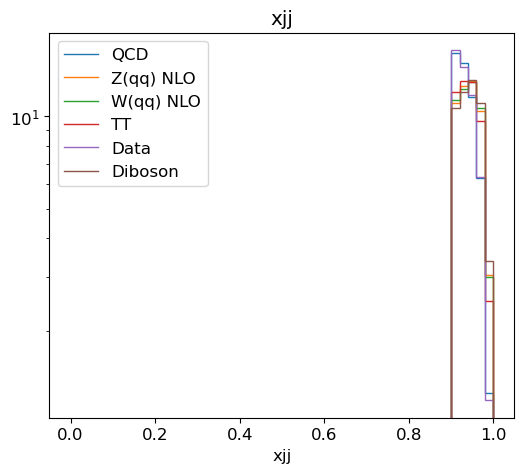

In [14]:
h_qcd = h_xjj[{"process": "QCD", "name": sum}]
h_data = h_xjj[{"process": "data", "name": sum}]
h_zto2q = h_xjj[{"process": "Zto2QNLO", "name": sum}]
h_wto2q = h_xjj[{"process": "Wto2QNLO", "name": sum}]
h_tt = h_xjj[{"process": "TT", "name": sum}]
h_diboson = h_xjj[{"process": "Diboson", "name": sum}]
labels = ["QCD", "Z(qq) NLO", "W(qq) NLO", "TT", "Data", "Diboson"]
h = [h_qcd, h_zto2q, h_wto2q, h_tt, h_data, h_diboson]
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
hep.histplot(h, ax=ax, label=labels, density=True)
ax.set_xlabel("xjj")
ax.legend()
ax.set_yscale("log")
ax.set_title("xjj")
ax.title

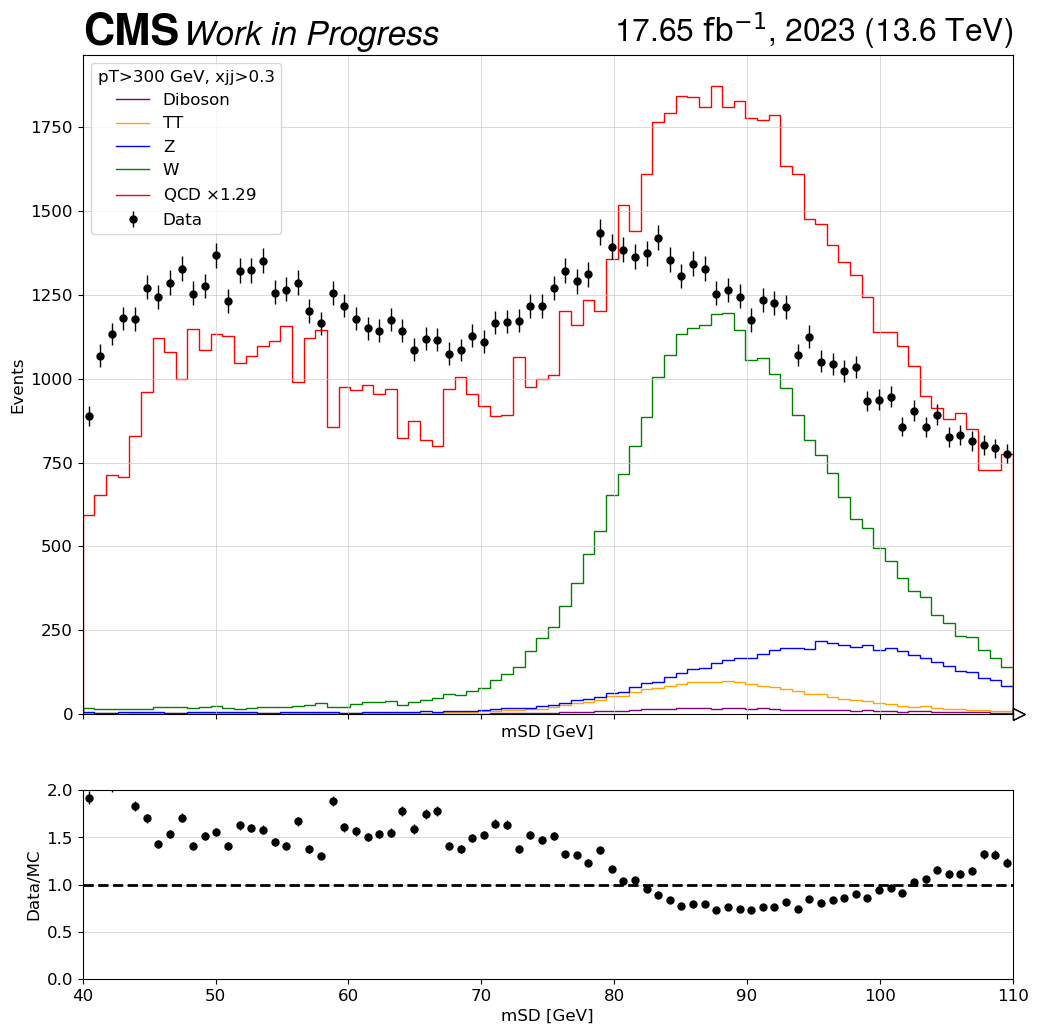

In [15]:

from hist.intervals import ratio_uncertainty

h_z = hists["Zto2QNLO"]
h_w = hists["Wto2QNLO"]
h_qcd = hists["QCD"]
h_diboson = hists["Diboson"]
h_tt = hists["TT"]
scale = kfactor["QCD"]

h_data = hists["data"]
h = [h_z, h_w, h_qcd, h_diboson, h_tt]
legends = ["Z", "W", r"QCD $\times$"+ f"{scale:.2f}", "Diboson", "TT"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']
# Apply kfactor to each histogram
h_scaled = [hists[sample] * kfactor[sample] for sample in ["Zto2QNLO", "Wto2QNLO", "QCD", "Diboson", "TT"]]


fig, (ax, rax) = plt.subplots(
            2,
            1,
            figsize=(12, 12),
            gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
            sharex=True,
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h_scaled, ax=ax, stack=True, sort="yield", label=legends, color=colors) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "Data")
ax.legend()
#ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV, xjj>0.3")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(40, 110)
ax.set_xlabel("mSD [GeV]")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
bg_total = sum(h) ## , h_qcd, h_diboson, h_tt
tot_val = bg_total.values()
tot_val_zero_mask = tot_val == 0
tot_val[tot_val_zero_mask] = 1
data_val = h_data.values()
data_val[tot_val_zero_mask] = 1
yerr = ratio_uncertainty(data_val, tot_val, "poisson")
yvalue = data_val / tot_val

hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="errorbar", color="black")
rax.set_ylabel("Data/MC")
rax.set_ylim(0, 2)
rax.set_xlabel("mSD [GeV]")
rax.set_xlim(40, 110)
rax.grid(axis="y")
rax.axhline(1, color="black", linestyle="--")
plt.show()

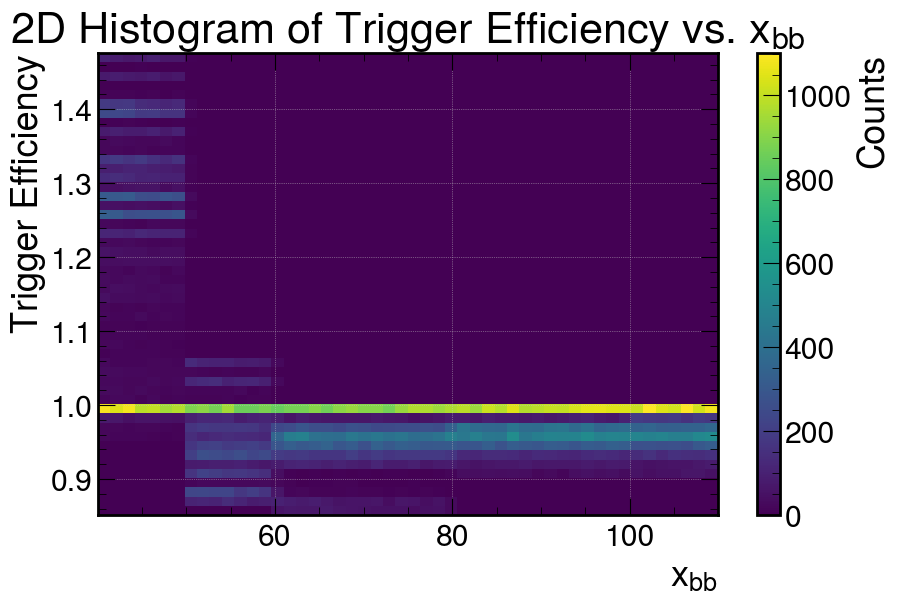

In [511]:
import correctionlib
import numpy as np
import matplotlib.pyplot as plt
from src.hpt import utils
from coffea.nanoevents.methods.nanoaod import FatJetArray

def plot_trigger_weight_vs_msd(events_dict):
    # Initialize lists to store msd and trigger weights
    all_msd = []
    all_trigger_weights = []

    for process, events in events_dict.items():
        for sample in events:
            weight = events[sample]["finalWeight"]
            msd = events[sample]["ak8FatJetmsoftdrop"][0]
            pt = events[sample]["ak8FatJetPt"][0]
            Pnet_xbb = events[sample]["ak8FatJetPNetTXbb"][0]
            Pnet_xjj = events[sample]["ak8FatJetPNetTXjj"][0]
            selection = (Pnet_xbb > 0.9) & ((msd > 40) & (msd < 110))

            if process == "QCD":
                trigger_weight, _, _ = trigger(events[sample])
                combined_weights = weight * trigger_weight
                selected_msd = msd[selection]
                selected_trigger_weights = trigger_weight[selection]
                
                all_msd.extend(selected_msd)
                all_trigger_weights.extend(selected_trigger_weights)

    # Convert lists to numpy arrays for easier plotting
    all_msd = np.array(all_msd)
    all_trigger_weights = np.array(all_trigger_weights)

    # Plot trigger weight vs. msd
    plt.figure(figsize=(10, 6))
    plt.hist2d(all_msd, all_trigger_weights, bins=[50, 50], cmap='viridis')
    plt.colorbar(label='Counts')
    plt.xlabel('x$_{bb}$')
    plt.ylabel('Trigger Efficiency')
    plt.title('2D Histogram of Trigger Efficiency vs. x$_{bb}$')
    plt.grid(True)
    plt.show()

# Call the function to generate the plot
plot_trigger_weight_vs_msd(events_dict)

ValueError: Size mismatch between "values" and "edges". Expected `len(values) + 1 == len(edges)`, but `len(values) = 300` and `len(edges) = 16`.

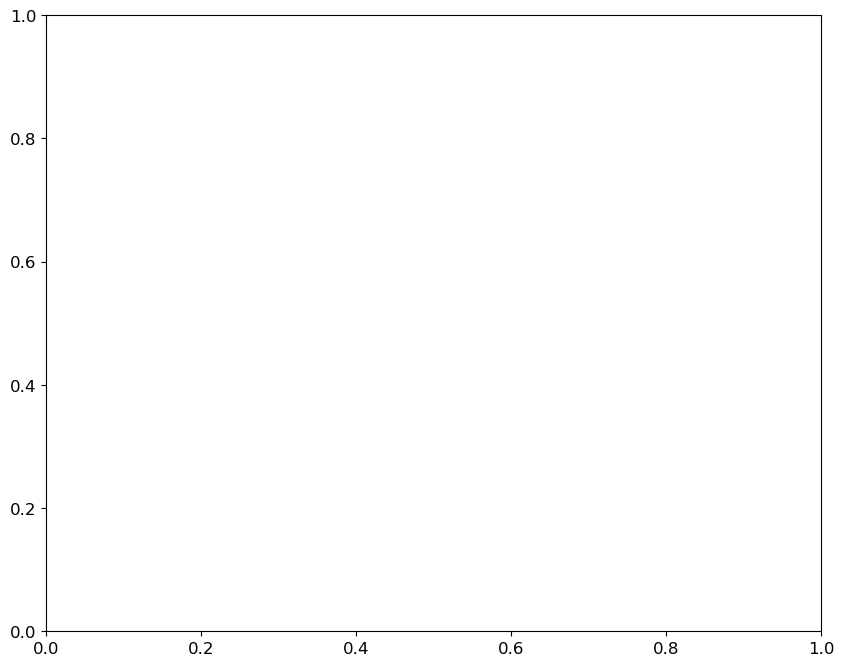

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import hist

def plot_msd_vs_trigger_weight(events_dict):
    # Define your msd bins and trigger weight bins
    msd_bins = np.array([
        0.0,
        5.0,
        10.0,
        20.0,
        30.0,
        40.0,
        50.0,
        60.0,
        80.0,
        100.0,
        120.0,
        150.0,
        200.0,
        250.0,
        300.0,
        350.0,
    ])
    
    trigger_weight_bins = np.array([
        0.0,
        0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3,
        0.35,
        0.4,
        0.45,
        0.5,
        0.55,
        0.6,
        0.65,
        0.7,
        0.75,
        0.8,
        0.85,
        0.9,
        0.95,
        1.0,
    ])

    # Collect data
    msd_values = []
    trigger_weights = []

    for process, events in events_dict.items():
        for sample in events:
            weight = events[sample]["finalWeight"]
            msd = events[sample]["ak8FatJetmsoftdrop"][0]

            if process == "QCD":
                trigger_weight, _, _ = trigger(events[sample])
                
                # Append values
                msd_values.extend(msd)
                trigger_weights.extend(trigger_weight)

    # Convert to numpy arrays for use with hist
    msd_values = np.array(msd_values)
    trigger_weights = np.array(trigger_weights)

    # Create 2D histogram
    h2d = hist.Hist(
        hist.axis.Variable(msd_bins, name="msd"),
        hist.axis.Variable(trigger_weight_bins, name="trigger_weight")
    )
    h2d.fill(msd_values, trigger_weights)

    # Plot with mplhep
    plt.figure(figsize=(10, 8))
    hep.histplot(h2d, histtype='fill', cmap='viridis', cbar=True)
    plt.xlabel('msd')
    plt.ylabel('Trigger Weight')
    plt.title('Trigger Weight vs. msd')
    plt.grid(True)
    plt.show()

# Call the function to generate the plot
plot_msd_vs_trigger_weight(events_dict)

AttributeError: QuadMesh.set() got an unexpected keyword argument 'marker'

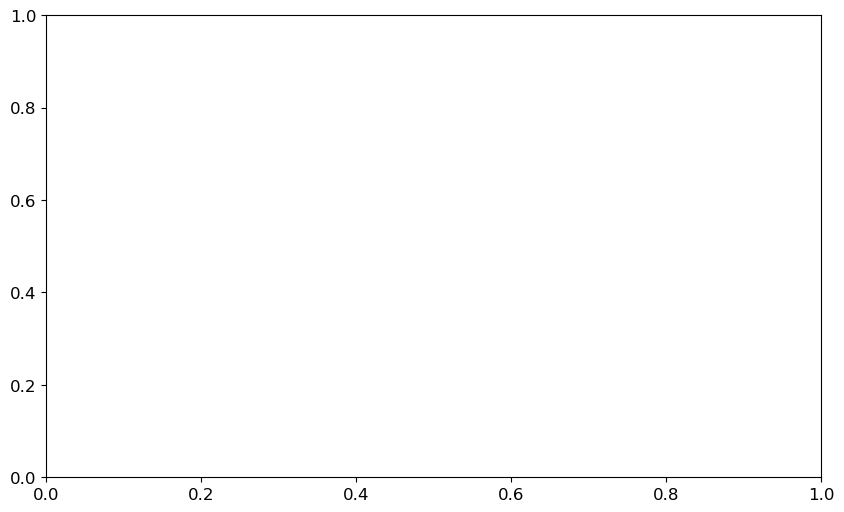

In [10]:
import correctionlib
import numpy as np
import matplotlib.pyplot as plt
from src.hpt import utils
from coffea.nanoevents.methods.nanoaod import FatJetArray

def plot_trigger_efficiency_vs_xbb(events_dict):
    # Initialize lists to store xbb and trigger efficiencies
    all_xbb = []
    all_trigger_efficiencies = []

    for process, events in events_dict.items():
        for sample in events:
            weight = events[sample]["finalWeight"]
            xbb = events[sample]["ak8FatJetPNetTXbb"][0]
            pt = events[sample]["ak8FatJetPt"][0]
            msd = events[sample]["ak8FatJetmsoftdrop"][0]

            selection = (xbb > 0.0)  # Modify as needed for your selection criteria

            if process == "QCD":
                trigger_weight, _, _ = trigger(events[sample])
                selected_xbb = xbb[selection]
                selected_trigger_efficiencies = trigger_weight[selection]

                all_xbb.extend(selected_xbb)
                all_trigger_efficiencies.extend(selected_trigger_efficiencies)

    # Convert lists to numpy arrays for easier plotting
    all_xbb = np.array(all_xbb)
    all_trigger_efficiencies = np.array(all_trigger_efficiencies)

    # Plot trigger efficiency vs. xbb
    plt.figure(figsize=(10, 6))
    plt.hist2d(all_xbb, all_trigger_efficiencies, alpha=0.5, marker='o', edgecolors='w', s=50)
    plt.xlabel('x$_{bb}$')
    plt.ylabel('Trigger Efficiency')
    plt.title('Trigger Efficiency vs. x$_{bb}$')
    plt.grid(True)
    plt.show()

# Call the function to generate the plot
plot_trigger_efficiency_vs_xbb(events_dict)

In [76]:
# Histos dictionary


hists = {}
individual_hists = {}
#legend = {}
lumi = 17650/1000
energy = "13.6 TeV"
for process, sample_list in events_dict.items():
    #zto = "Zto2Q" or "Zto2Nu"
    individual_hists[process] = {}
    #hists[process] = sum([h for h in h_msd[{"name": sample}]
    for sample, events in sample_list.items():
        try:
            individual_hists[process][sample] = h_pt[{"process": process, "name": sample}]
        except:
            print(f"KeyError: '{sample}' not found in the histogram axes.")
            continue
            
    hists[process]= sum([h for h in individual_hists[process].values()])
    #legend[process] = process
        




KeyError: 'QCD_HT-40to70' not found in the histogram axes.
KeyError: 'QCD_HT-70to100' not found in the histogram axes.
KeyError: 'QCD_HT-100to200' not found in the histogram axes.


In [308]:
hists

{'data': Hist(Regular(50, 200, 1000, name='pt', label='Jet $p_T$ [GeV]'), storage=Double()) # Sum: 76199.0 (76388.0 with flow),
 'Diboson': Hist(Regular(50, 200, 1000, name='pt', label='Jet $p_T$ [GeV]'), storage=Double()) # Sum: 159.88030754586086 (161.56358330992987 with flow),
 'TT': Hist(Regular(50, 200, 1000, name='pt', label='Jet $p_T$ [GeV]'), storage=Double()) # Sum: 1040.1573616243447 (1041.8323997475172 with flow),
 'Zto2QNLO': Hist(Regular(50, 200, 1000, name='pt', label='Jet $p_T$ [GeV]'), storage=Double()) # Sum: 6551.025469532097 (6570.568603046575 with flow),
 'Wto2QNLO': Hist(Regular(50, 200, 1000, name='pt', label='Jet $p_T$ [GeV]'), storage=Double()) # Sum: 1040.5515465260075 (1053.4686106295503 with flow),
 'QCD': Hist(Regular(50, 200, 1000, name='pt', label='Jet $p_T$ [GeV]'), storage=Double()) # Sum: 60151.0052072282 (60176.13507966726 with flow)}

In [77]:
bg_keys = ["Zto2QNLO", "Wto2QNLO", "QCD", "Diboson", "TT"]
kfactor = {sample: 1 for sample in bg_keys}

# Sum all background histograms using proper histogram summation
bg_yield = sum([hists[sample].sum() for sample in bg_keys])

# Assuming there's a specific histogram for the data yield
data_yield = hists["data"].sum()
if bg_yield > 0:
    kfactor["QCD"] = data_yield / bg_yield

    # k = data - everything else / everything else

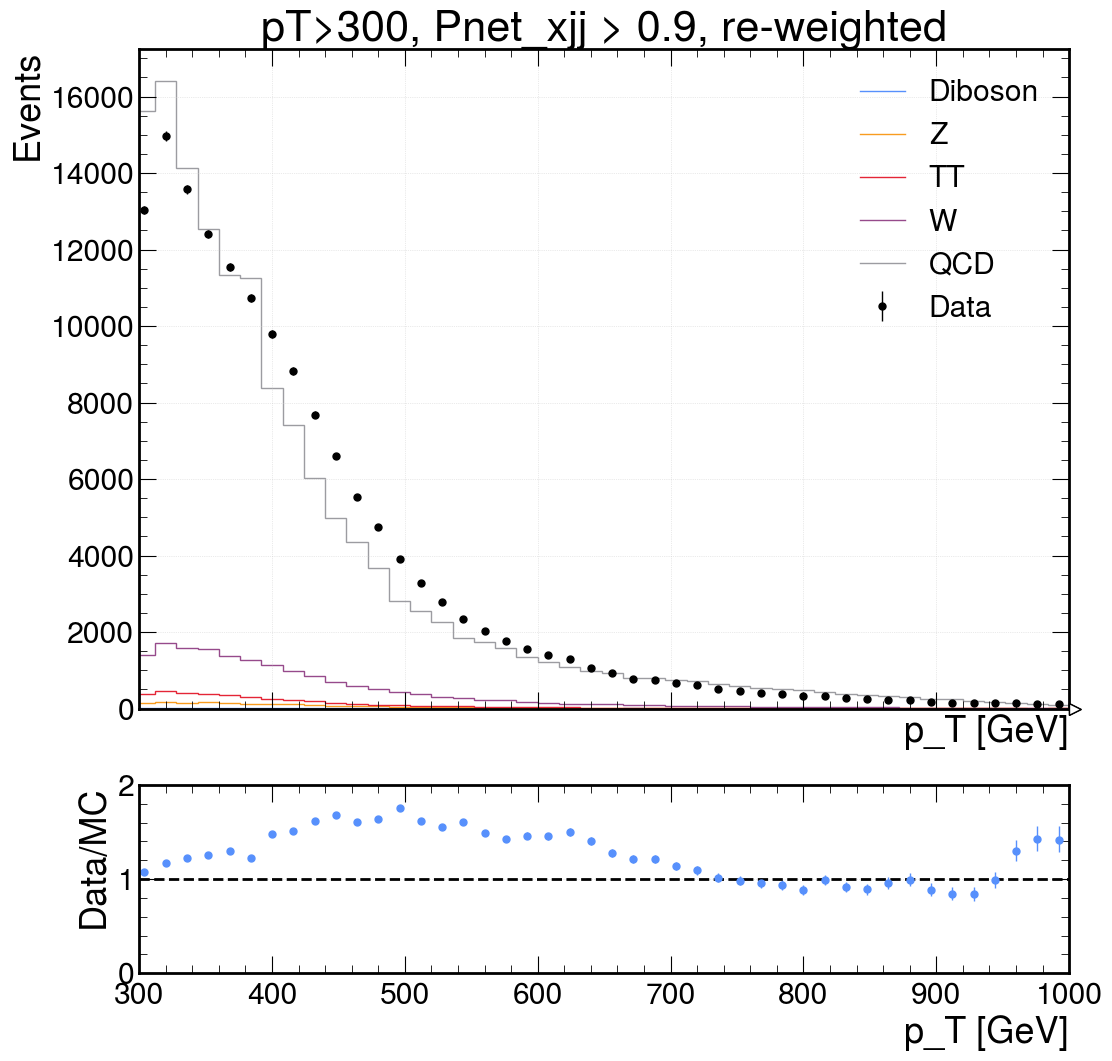

In [78]:

from hist.intervals import ratio_uncertainty

h_z = hists["Zto2QNLO"]
h_w = hists["Wto2QNLO"]
h_qcd = hists["QCD"]
h_diboson = hists["Diboson"]
h_tt = hists["TT"]

h_data = hists["data"]
h = [h_z, h_w, h_qcd, h_diboson, h_tt]
legends = ["Z", "W", "QCD", "Diboson", "TT"]
#labels = ["z", "w"]

# Apply kfactor to each histogram
h_scaled = [hists[sample] * kfactor[sample] for sample in ["Zto2QNLO", "Wto2QNLO", "QCD", "Diboson", "TT"]]


fig, (ax, rax) = plt.subplots(
            2,
            1,
            figsize=(12, 12),
            gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
            sharex=True,
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h_scaled, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "Data")
ax.legend()
#ax.set_yscale("log")
ax.set_title(f"pT>300, Pnet_xjj > 0.9, re-weighted")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(300, 1000)
ax.set_xlabel("p_T [GeV]")

# 2nd panel
bg_total = sum(h) ## , h_qcd, h_diboson, h_tt
tot_val = bg_total.values()
tot_val_zero_mask = tot_val == 0
tot_val[tot_val_zero_mask] = 1
data_val = h_data.values()
data_val[tot_val_zero_mask] = 1
yerr = ratio_uncertainty(data_val, tot_val, "poisson")
yvalue = data_val / tot_val

hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="errorbar")
rax.set_ylabel("Data/MC")
rax.set_ylim(0, 2)
rax.set_xlabel("p_T [GeV]")
rax.set_xlim(300, 1000)
rax.grid(axis="y")
rax.axhline(1, color="black", linestyle="--")
plt.show()

In [310]:
h_z

Hist(Regular(50, 200, 1000, name='pt', label='Jet $p_T$ [GeV]'), storage=Double()) # Sum: 6551.025469532097 (6570.568603046575 with flow)

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

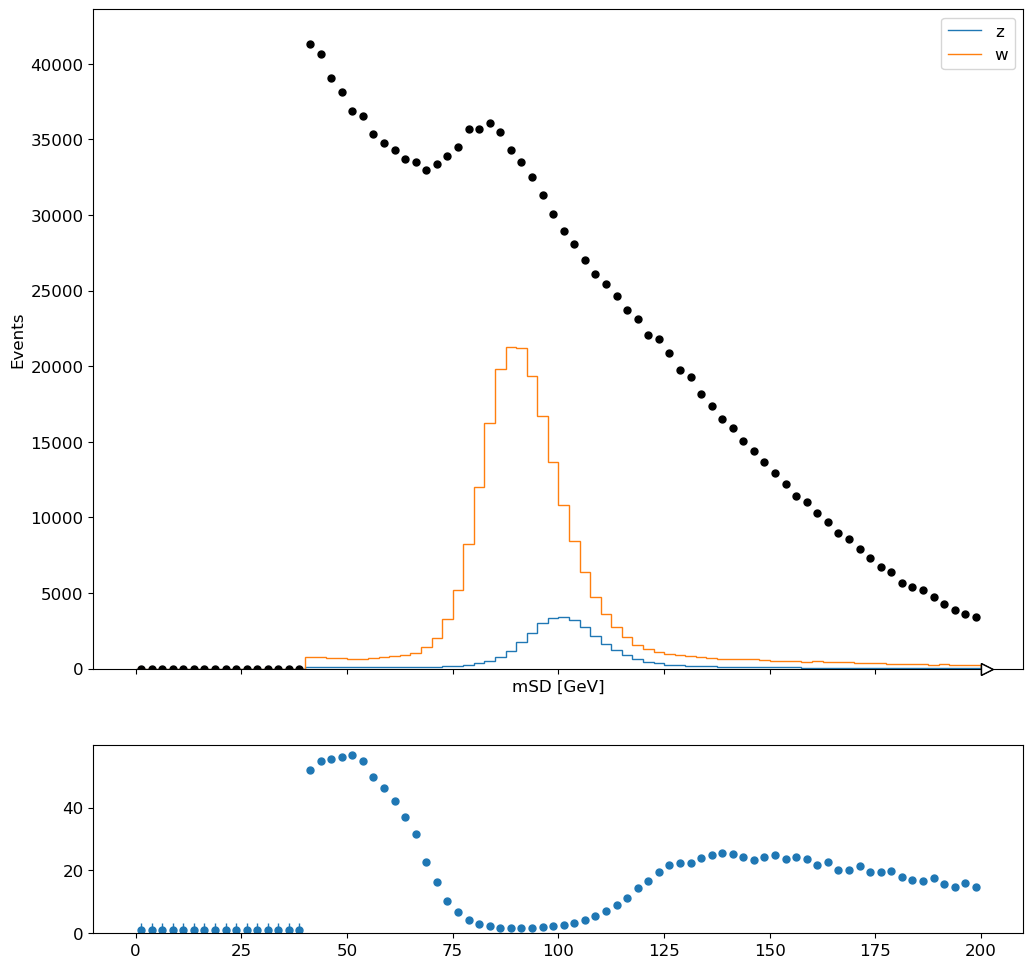

In [191]:

from hist.intervals import ratio_uncertainty

h_z = hists["Zto2QNLO"]
h_w = hists["Wto2QNLO"]

h_data = hists["data"]
labels = ["z", "w"]

fig, (ax, rax) = plt.subplots(
            2,
            1,
            figsize=(12, 12),
            gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
            sharex=True,
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot([h_z, h_w ], ax=ax, stack=True, sort="yield", label=labels) ##h_qcd, h_diboson, h_tt
# plot Data
hep.histplot(h_data, ax=ax, histtype="errorbar", color="black")
ax.legend()
# 2nd panel
bg_total = sum([h_z, h_w]) ## , h_qcd, h_diboson, h_tt
tot_val = bg_total.values()
tot_val_zero_mask = tot_val == 0
tot_val[tot_val_zero_mask] = 1
data_val = h_data.values()
data_val[tot_val_zero_mask] = 1
yerr = ratio_uncertainty(data_val, tot_val, "poisson")
yvalue = data_val / tot_val

hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="errorbar")

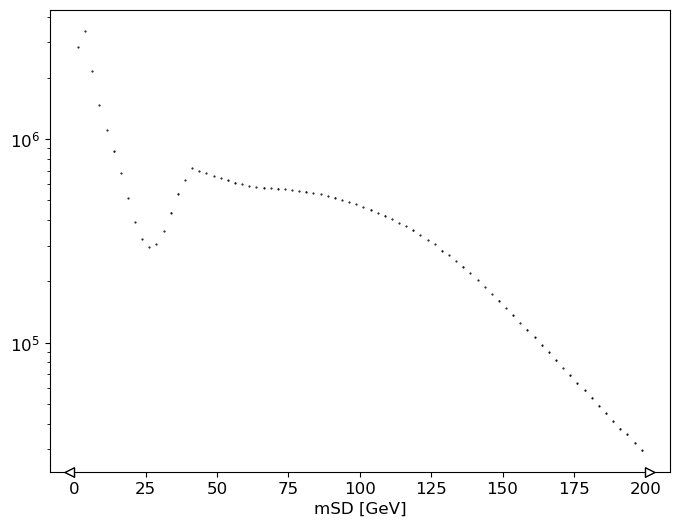

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
hep.histplot(h_data, ax=ax, yerr=True, histtype="errorbar", markersize=1, color="black")
ax.set_yscale("log")